In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [3]:
df['targets'] = df['labels'].astype('category').cat.codes

In [4]:
# number of classes
K = df['targets'].max()+1
K

5

In [5]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [6]:
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)

tokenizer.fit_on_texts(df_train['text'])

sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [7]:
#get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 27705 unique tokens.


In [8]:
# pad sequences so that we get a N*T matrix

data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

#get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1557, 2843)


In [9]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 2843)


### LSTM

In [10]:
#model

#chossing embedding dimensionality
D = 20

i = Input(shape = (T,))
x = Embedding(V + 1, D)(i) 
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)  

model = Model(i,x)

2022-06-23 12:17:25.633741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True), 
    optimizer = 'adam',
    metrics = ['accuracy']
    )

In [12]:
print('Training model...')
r = model.fit(
    data_train, 
    df_train['targets'], 
    epochs=50,
    validation_data=(data_test, df_test['targets'])
    )

Training model...
Epoch 1/50
49/49 [==============================] - 91s 2s/step - loss: 1.5985 - accuracy: 0.3025 - val_loss: 1.5861 - val_accuracy: 0.4461
Epoch 2/50
49/49 [==============================] - 88s 2s/step - loss: 1.4810 - accuracy: 0.4271 - val_loss: 1.4214 - val_accuracy: 0.3668
Epoch 3/50
49/49 [==============================] - 75s 2s/step - loss: 1.2617 - accuracy: 0.5806 - val_loss: 1.2098 - val_accuracy: 0.6138
Epoch 4/50
49/49 [==============================] - 77s 2s/step - loss: 1.0114 - accuracy: 0.6911 - val_loss: 0.9436 - val_accuracy: 0.7141
Epoch 5/50
49/49 [==============================] - 77s 2s/step - loss: 0.8395 - accuracy: 0.7964 - val_loss: 0.8133 - val_accuracy: 0.7844
Epoch 6/50
49/49 [==============================] - 80s 2s/step - loss: 0.7788 - accuracy: 0.8317 - val_loss: 0.9891 - val_accuracy: 0.7590
Epoch 7/50
49/49 [==============================] - 85s 2s/step - loss: 0.6178 - accuracy: 0.8683 - val_loss: 0.5973 - val_accuracy: 0.8937
Ep

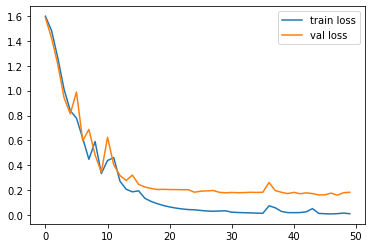

In [13]:
#plot loss per iteration
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show();

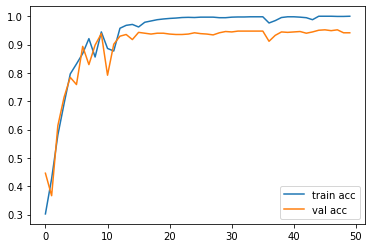

In [14]:
#accuracy per iteration
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show();

not stable as CNN

### GRU

In [16]:
D = 20

i = Input(shape = (T,))
x = Embedding(V + 1, D)(i) 
x = GRU(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)  

mod_gru = Model(i,x)

mod_gru.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True), 
    optimizer = 'adam',
    metrics = ['accuracy']
    )

print('Training model...')
r = mod_gru.fit(
    data_train, 
    df_train['targets'], 
    epochs=50,
    validation_data=(data_test, df_test['targets'])
    )

Training model...
Epoch 1/50
49/49 [==============================] - 73s 1s/step - loss: 1.5893 - accuracy: 0.3899 - val_loss: 1.5660 - val_accuracy: 0.4012
Epoch 2/50
49/49 [==============================] - 69s 1s/step - loss: 1.5008 - accuracy: 0.4477 - val_loss: 1.4262 - val_accuracy: 0.4476
Epoch 3/50
49/49 [==============================] - 69s 1s/step - loss: 1.2635 - accuracy: 0.5774 - val_loss: 1.0908 - val_accuracy: 0.7874
Epoch 4/50
49/49 [==============================] - 72s 1s/step - loss: 0.8607 - accuracy: 0.8857 - val_loss: 0.7111 - val_accuracy: 0.8817
Epoch 5/50
49/49 [==============================] - 68s 1s/step - loss: 0.5098 - accuracy: 0.9306 - val_loss: 0.4598 - val_accuracy: 0.9237
Epoch 6/50
49/49 [==============================] - 69s 1s/step - loss: 0.3331 - accuracy: 0.9634 - val_loss: 0.3359 - val_accuracy: 0.9356
Epoch 7/50
49/49 [==============================] - 69s 1s/step - loss: 0.2346 - accuracy: 0.9762 - val_loss: 0.2734 - val_accuracy: 0.9446
Ep

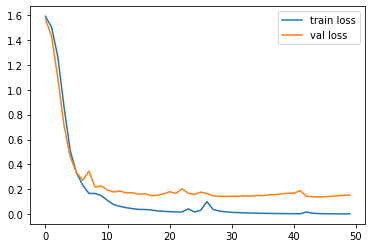

In [17]:
#plot loss per iteration
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show();

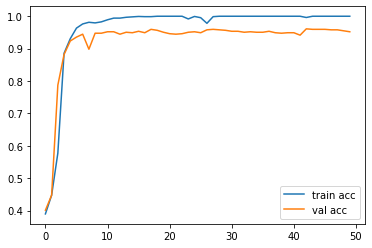

In [18]:
#accuracy per iteration
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show();

### SimpleRNN

In [19]:
D = 20

i = Input(shape = (T,))
x = Embedding(V + 1, D)(i) 
x = SimpleRNN(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)  

mod_rnn = Model(i,x)

mod_rnn.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True), 
    optimizer = 'adam',
    metrics = ['accuracy']
    )

print('Training model...')
r = mod_rnn.fit(
    data_train, 
    df_train['targets'], 
    epochs=10, #saving time
    validation_data=(data_test, df_test['targets'])
    )

Training model...
Epoch 1/10
49/49 [==============================] - 92s 2s/step - loss: 1.5999 - accuracy: 0.2518 - val_loss: 1.6035 - val_accuracy: 0.2275
Epoch 2/10
49/49 [==============================] - 71s 1s/step - loss: 1.5402 - accuracy: 0.3699 - val_loss: 1.5707 - val_accuracy: 0.3024
Epoch 3/10
49/49 [==============================] - 97s 2s/step - loss: 1.4788 - accuracy: 0.5183 - val_loss: 1.5501 - val_accuracy: 0.3533
Epoch 4/10
49/49 [==============================] - 91s 2s/step - loss: 1.4130 - accuracy: 0.6808 - val_loss: 1.5227 - val_accuracy: 0.4341
Epoch 5/10
49/49 [==============================] - 80s 2s/step - loss: 1.3318 - accuracy: 0.7508 - val_loss: 1.4442 - val_accuracy: 0.5299
Epoch 6/10
49/49 [==============================] - 85s 2s/step - loss: 1.2024 - accuracy: 0.8317 - val_loss: 1.3431 - val_accuracy: 0.6243
Epoch 7/10
49/49 [==============================] - 82s 2s/step - loss: 1.0697 - accuracy: 0.8940 - val_loss: 1.1667 - val_accuracy: 0.7066
Ep

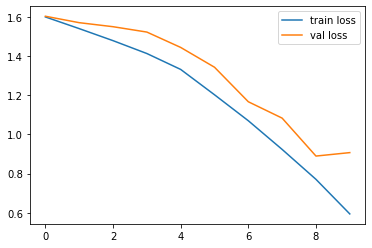

In [20]:
#plot loss per iteration
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show();

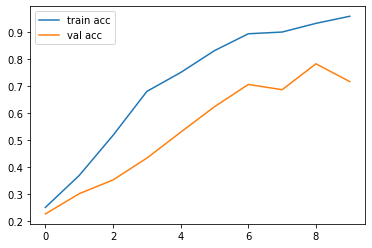

In [21]:
#accuracy per iteration
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show();

not enough epoch

## Choose best combination of hyperparameters

- GRU/LSTM/SimpleRNN
- return_sequence = False, no maxpool
- dff number of hidden layers